<a href="https://colab.research.google.com/github/FernandoAyala2507/Silueta/blob/main/Codigo_R_PN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Asegúrate de copiar la URL "raw" correcta
url <- "https://github.com/FernandoAyala2507/Silueta/raw/refs/heads/main/PERSONAS.xlsx"
# Intentar descargar el archivo a tu entorno de Google Colab
download.file(url, destfile = "PERSONAS.xlsx", mode = "wb")
# Leer el archivo Excel con readxl
install.packages("readxl")
library(readxl)
data_PN_kmeans_personas <- read_excel("PERSONAS.xlsx")
# Ver las primeras filas de los datos
head(data_PN_kmeans_personas)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



NUM_DOCUMENTO,COD_CLIENTE,TIPO_DOC,DEPARAMENTO,NACIONALIDAD,RESIDENCIA,BANCA,ACT_ECONOMICA,EDAD,SALPRO_USD,ANTIGUEDAD_scale,SALPRO_USD_scale,SALPRO_USD_rango
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
10062425,30770,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,50.00000,5000,0.25416414004576,0.125077110948164,"[5e+03,5e+04)"
08115739,165089,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,57.00000,5000,0.754222453303004,0.125077110948164,"[5e+03,5e+04)"
08646977,329862,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,46.44212,5000,0,0.125077110948164,"[5e+03,5e+04)"
07515947,542277,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,70.00000,5000,1.6829021779236,0.125077110948164,"[5e+03,5e+04)"
07606852,619685,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,58.00000,5000,0.825659355196896,0.125077110948164,"[5e+03,5e+04)"
06738619,781916,DNI,Lima,PERU,PE,PERSONAS,PERSONAS NATURALES Y GRUPO,64.00000,5000,1.25428076656025,0.125077110948164,"[5e+03,5e+04)"


In [3]:
install.packages("cluster")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
X1= data_PN_kmeans_personas [, 11:12]

head(X1)

options(scipen = 999)
#Indice de silueta: Hallar el valor optimo de  "K"(Clusters).
#----------------------------------------------------------------------------------------------------------------------
# Clusters para personas
set.seed(123)

# Probar diferentes valores de k (por ejemplo, de 2 a 15 clústeres)
sil_values <- sapply(2:15, function(k){
  kmeans_result <- kmeans(X1, centers = k,iter.max = 1000,nstart = 25)
  sil <- silhouette(kmeans_result$cluster, dist(X1))
  mean(sil[, 3])  # Promedio del índice de silueta
})


ANTIGUEDAD_scale,SALPRO_USD_scale
<chr>,<chr>
0.25416414004576,0.125077110948164
0.754222453303004,0.125077110948164
0,0.125077110948164
1.6829021779236,0.125077110948164
0.825659355196896,0.125077110948164
1.25428076656025,0.125077110948164


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3226400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3226400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3226400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3226400)”


In [8]:

install.packages("ggplot2")  # Solo si quieres usar ggplot2
library(ggplot2)  # Solo si lo necesitas

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
set.seed(123)
sil_values <- sapply(1:15, function(k) {
  tryCatch({
    kmeans_result <- kmeans(X1, centers = k, iter.max = 10000, nstart = 25)
    sil <- silhouette(kmeans_result$cluster, dist(X1))
    mean(sil[, 3])  # Promedio del índice de silueta
  }, warning = function(w) {
    cat("Warning for k =", k, ": ", conditionMessage(w), "\n")
    return(NA)  # Devuelve NA si hay una advertencia
  }, error = function(e) {
    cat("Error for k =", k, ": ", conditionMessage(e), "\n")
    return(NA)  # Devuelve NA si hay un error
  })
})


Warning for k = 8 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 
Warning for k = 9 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 
Warning for k = 11 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 
Warning for k = 13 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 
Warning for k = 14 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 
Warning for k = 15 :  Quick-TRANSfer stage steps exceeded maximum (= 3226400) 


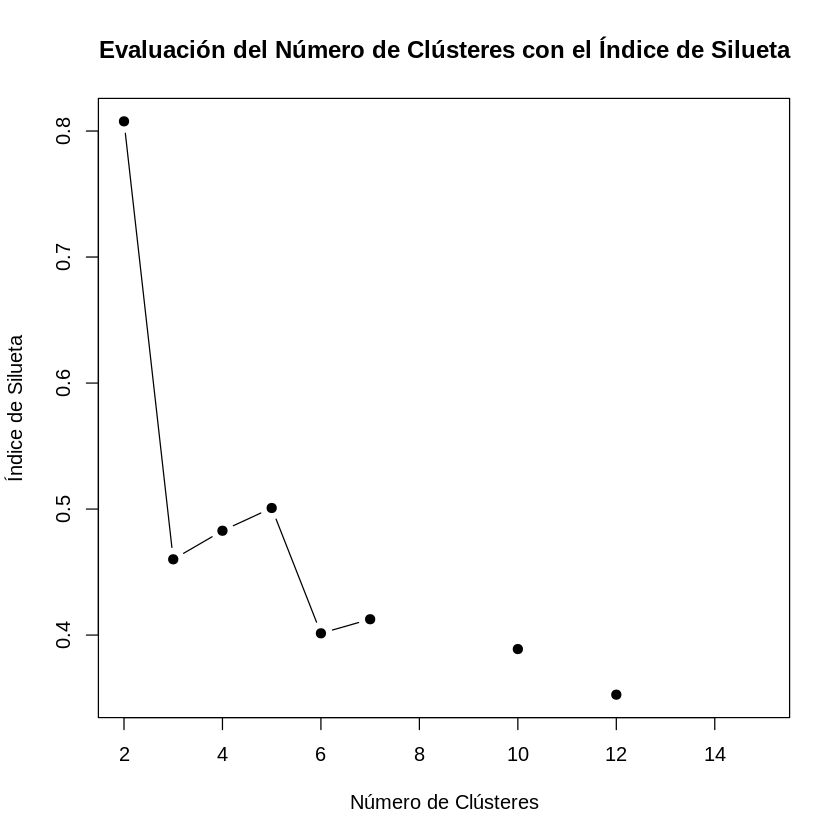

In [10]:
# Visualizar los resultados
plot(2:15, sil_values, type = "b", pch = 19,
     xlab = "Número de Clústeres", ylab = "Índice de Silueta",
     main = "Evaluación del Número de Clústeres con el Índice de Silueta")